(As of mid september 2022)

# Visualizing results from the Experiments.

The output files contain many different variables, but in the end they can all be plotted rather similarly.
I want to provide code for the following types of plots (and subplot structures for combining them).
Preliminary plotting code. The plots for the preprocessing (correlation-distance, mean model/simulation ...) is done in a separate notebook (notebook_misc/basic_plots.ipynb)


- Plots:
    - Map for Evaluation Metric (e.g) Correlation. 
    - Diffplot comparing two reconstruction metrics (e.g Sisal vs Iso2k locations)
    - Panels combining these types of plots for different configurations/models/... The main thing is a shared colorbar. Although it's tempting, I try to not make it too overwhelming.
    
     - Foreign model experiments (Parsons 2021 , King 2021 also has a nice plot panel in fig 2, for swarmplot look https://github.com/amrhein/Structural_uncertainties/blob/main/prior_truth_last1000_Nens_400_analysis.ipynb)
    - Reconstruction metrics when reusing proxies on multiple timescales (for different SNR, this is my new thing, reusing proxies may be an option!)
    
    - Reconstructed variable plot:
        - Hovmöllerplot for timeseries
        - GMT Plots for different models, annomaly option.
      

In [2]:
import sys
sys.path.append('/home/mchoblet/paleoda')
import xarray as xr
import numpy as np

from types import SimpleNamespace

In [48]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import cartopy.crs as ccrs
from scipy.stats import linregress
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  

import warnings

import psm_pseudoproxy
import utils 
import evaluation

import pandas as pd

from matplotlib.offsetbox import AnchoredText    

In [4]:
%load_ext autoreload
%autoreload 2

## Experiment 0

In [5]:
paths={'Echam':[
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_sisal.nc'],
'GISS':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_sisal.nc'],
'iCESM':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_sisal.nc'],
'iHadCM3':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_sisal.nc'],
'isoGSM':['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/isoGSM_both.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/isoGSM_iso2k.nc',
'/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/isoGSM_sisal.nc']
}



In [9]:
sis=xr.open_dataset(paths['Echam'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['Echam'][1])['tsurf_Corr']
(sis-iso).plot()

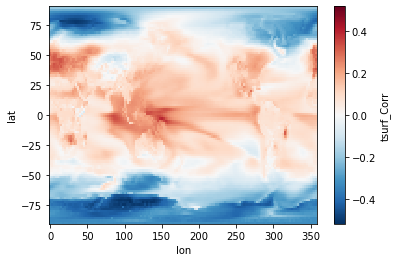

In [11]:
sis=xr.open_dataset(paths['iCESM'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['iCESM'][1])['tsurf_Corr']
(sis-iso).plot()

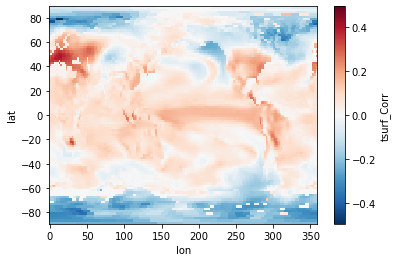

In [12]:
sis=xr.open_dataset(paths['isoGSM'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['isoGSM'][1])['tsurf_Corr']
(sis-iso).plot()

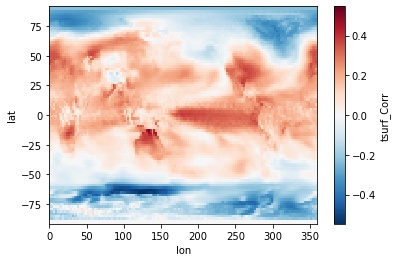

In [13]:
sis=xr.open_dataset(paths['GISS'][2])['tsurf_Corr']
iso=xr.open_dataset(paths['GISS'][1])['tsurf_Corr']
(sis-iso).plot()

In [6]:
sis=xr.open_dataset(paths['iHadCM3'][2])

In [7]:
sis['tsurf_mean'].values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [ ]:
s

In [36]:
paths_dic['Echam']

['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_both.nc',
 '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_iso2k.nc',
 '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_sisal.nc']

In [40]:
for i,(p,v) in enumerate(paths_dic.items()):
    print(i,p,v)

0 Echam ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/Echam_sisal.nc']
1 GISS ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/GISS_sisal.nc']
2 iCESM ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iCESM_sisal.nc']
3 iHadCM3 ['/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_both.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_iso2k.nc', '/home/mchoblet/paleoda/results/experiments/ppe_sisal_vs_iso/iHadCM3_sisal.nc']
4 isoGSM ['/home/mchoblet/pa

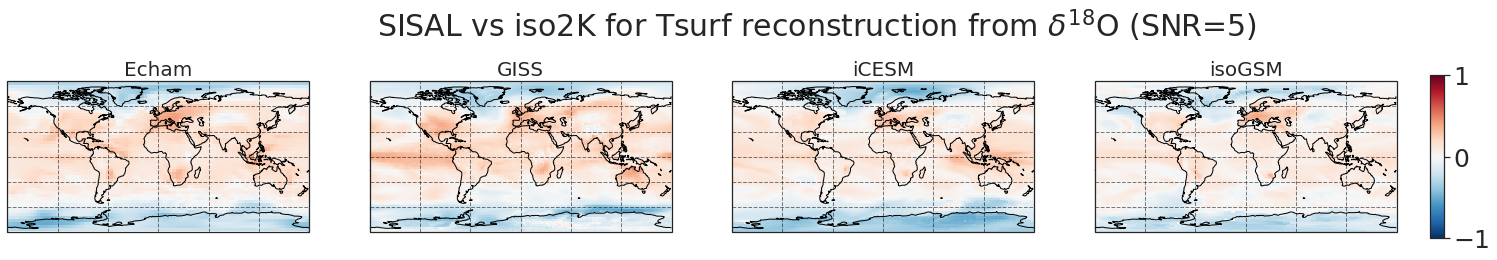

In [126]:
# Difference plot
def plot_dif(paths_dic,metric='Corr',title='Temperature reconstruction from $\delta^{18}$O (SNR=5)'):
    pass
#vars=['tsurf','pr','d18O']

metric='Corr'
title='SISAL vs iso2K for Tsurf reconstruction from $\delta^{18}$O (SNR=5)'
paths_dic=paths

sns.set_theme(style="white")

ncols=4
figsize=(30,6)
fig, axes = plt.subplots(ncols=ncols,nrows=1,sharex=False,sharey=True,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
plt.suptitle(title,fontsize=30,y=0.85)

j=0
for i,(p,v) in enumerate(paths_dic.items()):
    if p!='iHadCM3':
        strg='tsurf_'+metric
        sisal=xr.open_dataset(paths_dic[p][2])[strg]
        iso2k=xr.open_dataset(paths_dic[p][1])[strg]

        ax=axes[j]
        j+=1
        trans=ccrs.PlateCarree()

        #set colorbar limits
        if metric in ['Corr','CE']:
            vmin=-1
            vmax=1
            cmap='RdBu_r'

        colorbar=False
        plot=(sisal-iso2k).plot(ax=ax,transform=trans,x='lon',y='lat',add_colorbar=colorbar,vmin=vmin,vmax=vmax,cmap=cmap)

        ax.axes.xaxis.set_visible(True)
        ax.axes.yaxis.set_visible(True)
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        ax.add_feature(cfeature.COASTLINE)
        ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')

        #suppress all unwanted titles created by xrray
        ax.set_title(p,fontsize=20)

        ax.set_xlabel('',fontsize=30,rotation=0)
        ax.set_ylabel('',fontsize=30,rotation=0)
        ax.yaxis.set_label_coords(-0.15,0.4)

cbar=fig.colorbar(plot,ax=axes.ravel().tolist(),shrink=0.5,aspect=12,pad=0.02)
cbar.ax.tick_params(labelsize=25)

savefig='sisal_vs_iso'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')
plt.show()

#plt.tight_layout() 

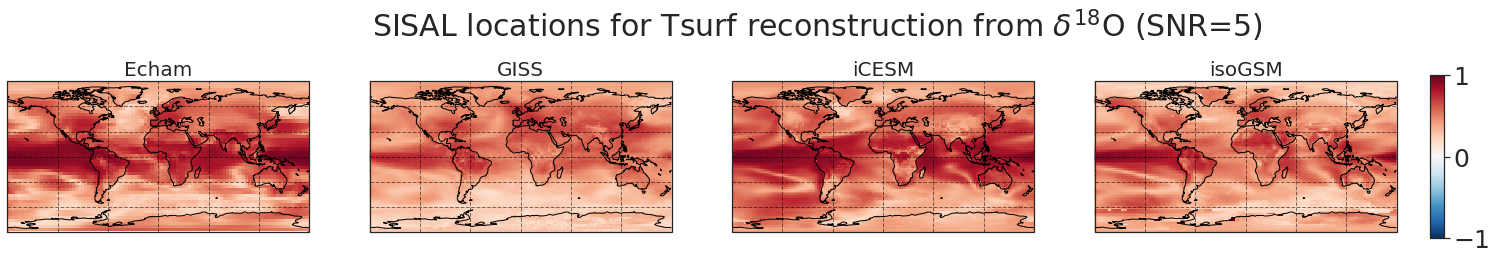

In [132]:
metric='Corr'
title='SISAL locations for Tsurf reconstruction from $\delta^{18}$O (SNR=5)'
paths_dic=paths

sns.set_theme(style="white")

ncols=4
figsize=(30,6)
fig, axes = plt.subplots(ncols=ncols,nrows=1,sharex=False,sharey=True,figsize=figsize,subplot_kw={'projection':ccrs.PlateCarree()})
plt.suptitle(title,fontsize=30,y=0.85)

j=0
for i,(p,v) in enumerate(paths_dic.items()):
    if p!='iHadCM3':
        strg='tsurf_'+metric
        sisal=xr.open_dataset(paths_dic[p][2])[strg]
        #iso2k=xr.open_dataset(paths_dic[p][1])[strg]

        ax=axes[j]
        j+=1
        trans=ccrs.PlateCarree()

        #set colorbar limits
        if metric in ['Corr','CE']:
            vmin=-1
            vmax=1
            cmap='RdBu_r'

        colorbar=False
        plot=(sisal).plot(ax=ax,transform=trans,x='lon',y='lat',add_colorbar=colorbar,vmin=vmin,vmax=vmax,cmap=cmap)

        ax.axes.xaxis.set_visible(True)
        ax.axes.yaxis.set_visible(True)
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        ax.add_feature(cfeature.COASTLINE)
        ax.axes.gridlines(color='black',alpha=0.5,linestyle='--')

        #suppress all unwanted titles created by xrray
        ax.set_title(p,fontsize=20)

        ax.set_xlabel('',fontsize=30,rotation=0)
        ax.set_ylabel('',fontsize=30,rotation=0)
        ax.yaxis.set_label_coords(-0.15,0.4)

cbar=fig.colorbar(plot,ax=axes.ravel().tolist(),shrink=0.5,aspect=12,pad=0.02)
cbar.ax.tick_params(labelsize=25)

savefig='sisal_corr'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')
plt.show()


# Foreign model experiments

In [93]:
paths_echam=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_Echam_prior.nc', '/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/Echam_PP_isoGSM_prior.nc']
paths_giss=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/GISS_PP_isoGSM_prior.nc']
paths_icesm=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iCESM_PP_isoGSM_prior.nc']
#paths_ihad=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_isoGSM_prior.nc']
paths_isogsm=['/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/isoGSM_PP_Echam_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/isoGSM_PP_GISS_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/iHadCM3_PP_iCESM_prior.nc','/home/mchoblet/paleoda/results/experiments/ppe_altphys_d18O/isoGSM_PP_isoGSM_prior.nc']




In [104]:
models=np.concatenate([np.repeat([i],4) for i in ['Echam','GISS','iCESM','isoGSM']])
priors=np.vstack([np.repeat([i],4) for i in ['Echam','GISS','iCESM','isoGSM']]).T.reshape(-1)

In [96]:
correlations=[]
rang=4
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_echam[i])['tsurf_Corr'],'corr').values)
print('')
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_giss[i])['tsurf_Corr'],'corr').values)
print('')
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_icesm[i])['tsurf_Corr'],'corr').values)
print('')
#for i in range(rang):
#    correlations.append(utils.globalmean(xr.open_dataset(paths_ihad[i])['tsurf_Corr'],'corr').values)
print('')
for i in range(rang):
    correlations.append(utils.globalmean(xr.open_dataset(paths_isogsm[i])['tsurf_Corr'],'corr').values)

In [98]:
correlations=np.array(correlations)

In [105]:
df=pd.DataFrame(data=[models,priors,correlations]).T
df.columns=['model','prior','correlation']

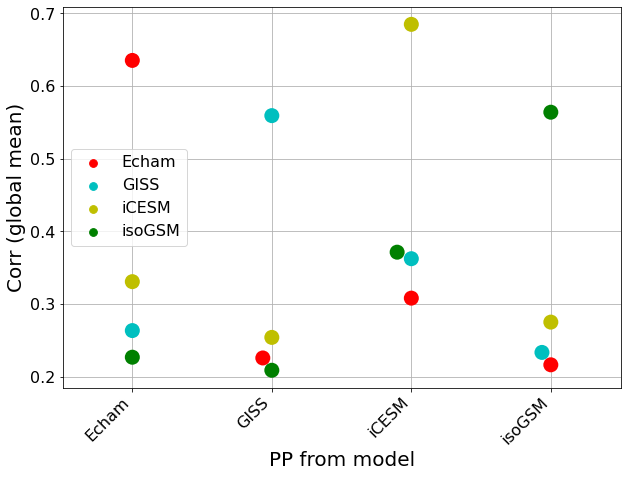

In [117]:
savefig='alt_phys'

model_list=['Echam','GISS','iCESM','isoGSM']
si = 15
fig = plt.figure(figsize=(10,7))
ax=sns.swarmplot(data=df,x="model", y="correlation", hue="prior",size=si,marker='o',palette=["r", "c", "y","g","b"],)
#ax=sns.swarmplot(data=df,x="model", y="correlation", hue="model",size=si,marker='.',palette=["r", "c", "y","g","b"])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(np.arange(len(model_list)),model_list)
plt.xlabel('PP from model',fontsize=20)
plt.xticks(rotation=45,ha="right",fontsize=16)
plt.ylabel('Corr (global mean)',fontsize=20)
plt.yticks(fontsize=16)

l = plt.legend(handles[0:4], labels[0:4], loc='center left',frameon=True,fontsize=16)
#plt.tight_layout()

# For final paper figure
plt.grid()
#ax.legend_.remove()
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')


## Hovmöllerplot/Timeseries

In [52]:
paths_real=['/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/Echam_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/GISS_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/iCESM_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/iHadCM3_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24_frac_mean_T/isoGSM_0000_2015.nc']


In [63]:
paths_real2=['/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/Echam_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/GISS_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/iCESM_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/iHadCM3_0000_2015.nc',
'/home/mchoblet/paleoda/results/experiments/Real_both_1_3_6_12_24/isoGSM_0000_2015.nc']


In [54]:
echam_recon=xr.open_dataset(paths_real[0])

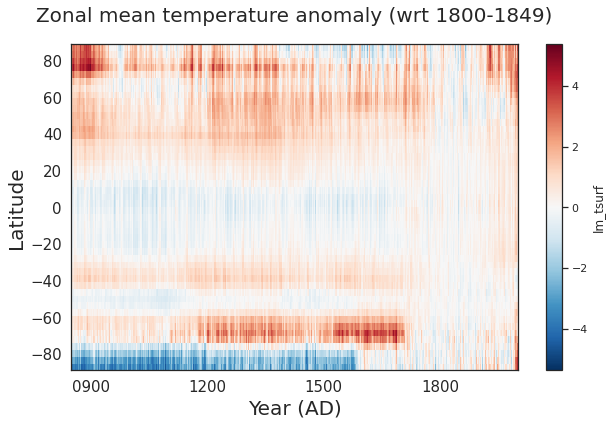

In [125]:
start='0850'
end='2000'

plt.figure(figsize=(10,6))
(echam_recon['lm_tsurf']-echam_recon['lm_tsurf'].sel(time=slice('1800','1849')).mean('time')).sel(time=slice(start,end)).T.plot()
plt.title('Zonal mean temperature anomaly (wrt 1800-1849)',fontsize=20,y=1.05)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year (AD)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

savefig='echam_hov'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')

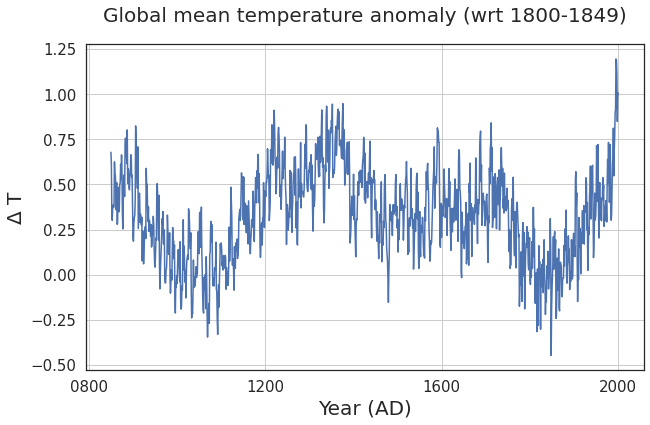

In [129]:
start='0850'
end='2000'

plt.figure(figsize=(10,6))
(echam_recon['gm_tsurf']-echam_recon['gm_tsurf'].sel(time=slice('1800','1849')).mean('time')).sel(time=slice(start,end)).T.plot()
plt.title('Global mean temperature anomaly (wrt 1800-1849)',fontsize=20,y=1.05)
plt.ylabel(r'$\Delta$ T',fontsize=20)
plt.xlabel('Year (AD)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

savefig='echam_gmt'
strg='/home/mchoblet/paleoda/results/plots/'+savefig+'.pdf'
plt.savefig(strg, format='pdf',bbox_inches='tight')

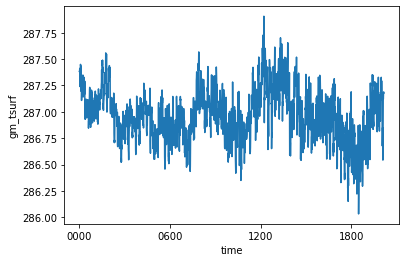

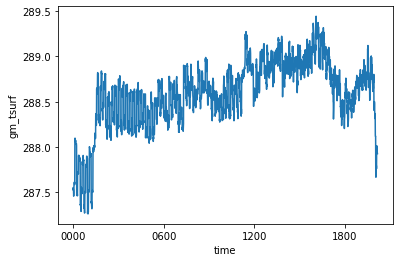

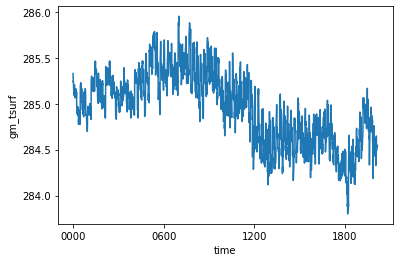

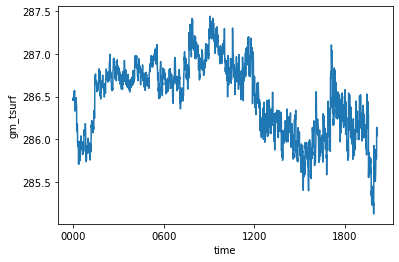

In [65]:
for i in range(5):
    try:
        xr.open_dataset(paths_real2[i])['gm_tsurf'].plot()
        plt.show()
    except:
        pass